In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("data/data_subset.csv", index_col=0)

In [3]:
df 

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,date,avgTemp,_merge,bike_rides_daily
0,AC76F5E4EFDCE317,electric_bike,2022-01-02 16:20:01,2022-01-02 16:22:34,Lexington Ave & E 111 St,7567.06,E 115 St & Madison Ave,7599.02,40.795412,-73.944123,40.798944,-73.944846,casual,2022-01-02,11.4,both,2
1,E121DC402DB250F1,classic_bike,2022-01-02 14:28:05,2022-01-02 14:58:12,48 St & 5 Ave,3202.06,Bond St & Bergen St,4404.10,40.646351,-74.009271,40.684967,-73.986208,member,2022-01-02,11.4,both,2
2,67E6F94A7B94F776,electric_bike,2022-01-03 20:11:00,2022-01-03 20:15:17,E 156 & Brook Ave,7896.11,E 161 St & Park Ave,7979.17,40.819823,-73.912411,40.824811,-73.916407,member,2022-01-03,1.4,both,1
3,441B0C0506D400C2,classic_bike,2022-01-04 12:43:34,2022-01-04 12:46:59,E 33 St & 1 Ave,6197.08,E 39 St & 2 Ave,6345.08,40.743227,-73.974498,40.748033,-73.973828,casual,2022-01-04,-2.7,both,1
4,99005ACE9002E034,electric_bike,2022-01-06 23:05:29,2022-01-06 23:12:23,W 37 St & 10 Ave,6611.02,W 52 St & 11 Ave,6926.01,40.756604,-73.997901,40.767272,-73.993929,member,2022-01-06,4.9,both,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1909EEBDB8561EF3,classic_bike,2022-12-25 16:51:22,2022-12-25 17:11:28,Sands St & Jay St,4821.03,Cliff St & Fulton St,5065.14,40.700119,-73.986200,40.708380,-74.004950,member,2022-12-25,-6.9,both,1
996,835FC1877F5B64A2,classic_bike,2022-12-26 15:17:21,2022-12-26 15:37:04,Brooklyn Ave & Dean St,4131.03,Kingston Ave & Park Pl,4016.03,40.676786,-73.944239,40.673080,-73.941910,member,2022-12-26,-4.7,both,1
997,4C5C1A46D62AA1BC,classic_bike,2022-12-30 12:44:40,2022-12-30 12:48:00,E 23 St & 1 Ave,5929.01,E 17 St & 2 Ave,5896.01,40.736502,-73.978095,40.734312,-73.983725,member,2022-12-30,9.3,both,2
998,39BD3E36E8E24D86,classic_bike,2022-12-30 15:22:03,2022-12-30 15:27:33,46 St & 25 Ave,6907.03,Steinway St & Ditmars Blvd,7074.01,40.765992,-73.906829,40.772717,-73.906127,member,2022-12-30,9.3,both,2


In [4]:
df_group = pd.DataFrame(df.groupby('date')['ride_id'].count()).reset_index()
df_group.rename(columns = {'ride_id':'bike_rides_daily'}, inplace = True)
df = df.merge(df_group, on = 'date', how = 'outer')

In [5]:
df

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,date,avgTemp,_merge,bike_rides_daily_x,bike_rides_daily_y
0,AC76F5E4EFDCE317,electric_bike,2022-01-02 16:20:01,2022-01-02 16:22:34,Lexington Ave & E 111 St,7567.06,E 115 St & Madison Ave,7599.02,40.795412,-73.944123,40.798944,-73.944846,casual,2022-01-02,11.4,both,2,2
1,E121DC402DB250F1,classic_bike,2022-01-02 14:28:05,2022-01-02 14:58:12,48 St & 5 Ave,3202.06,Bond St & Bergen St,4404.10,40.646351,-74.009271,40.684967,-73.986208,member,2022-01-02,11.4,both,2,2
2,67E6F94A7B94F776,electric_bike,2022-01-03 20:11:00,2022-01-03 20:15:17,E 156 & Brook Ave,7896.11,E 161 St & Park Ave,7979.17,40.819823,-73.912411,40.824811,-73.916407,member,2022-01-03,1.4,both,1,1
3,441B0C0506D400C2,classic_bike,2022-01-04 12:43:34,2022-01-04 12:46:59,E 33 St & 1 Ave,6197.08,E 39 St & 2 Ave,6345.08,40.743227,-73.974498,40.748033,-73.973828,casual,2022-01-04,-2.7,both,1,1
4,99005ACE9002E034,electric_bike,2022-01-06 23:05:29,2022-01-06 23:12:23,W 37 St & 10 Ave,6611.02,W 52 St & 11 Ave,6926.01,40.756604,-73.997901,40.767272,-73.993929,member,2022-01-06,4.9,both,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1909EEBDB8561EF3,classic_bike,2022-12-25 16:51:22,2022-12-25 17:11:28,Sands St & Jay St,4821.03,Cliff St & Fulton St,5065.14,40.700119,-73.986200,40.708380,-74.004950,member,2022-12-25,-6.9,both,1,1
996,835FC1877F5B64A2,classic_bike,2022-12-26 15:17:21,2022-12-26 15:37:04,Brooklyn Ave & Dean St,4131.03,Kingston Ave & Park Pl,4016.03,40.676786,-73.944239,40.673080,-73.941910,member,2022-12-26,-4.7,both,1,1
997,4C5C1A46D62AA1BC,classic_bike,2022-12-30 12:44:40,2022-12-30 12:48:00,E 23 St & 1 Ave,5929.01,E 17 St & 2 Ave,5896.01,40.736502,-73.978095,40.734312,-73.983725,member,2022-12-30,9.3,both,2,2
998,39BD3E36E8E24D86,classic_bike,2022-12-30 15:22:03,2022-12-30 15:27:33,46 St & 25 Ave,6907.03,Steinway St & Ditmars Blvd,7074.01,40.765992,-73.906829,40.772717,-73.906127,member,2022-12-30,9.3,both,2,2


<Axes: xlabel='rideable_type'>

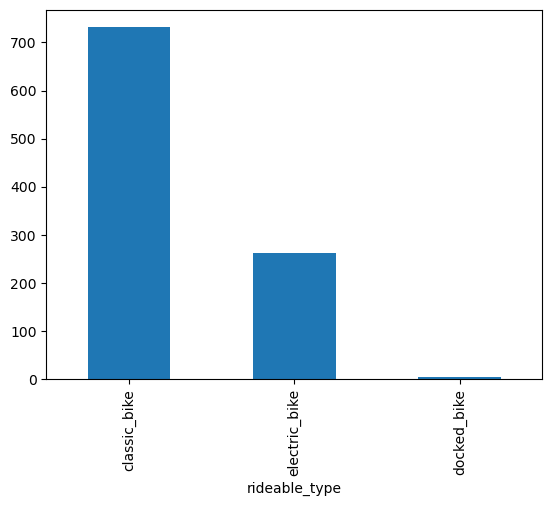

In [6]:
df['rideable_type'].value_counts().plot(kind = 'bar')

<Axes: xlabel='rideable_type', ylabel='count'>

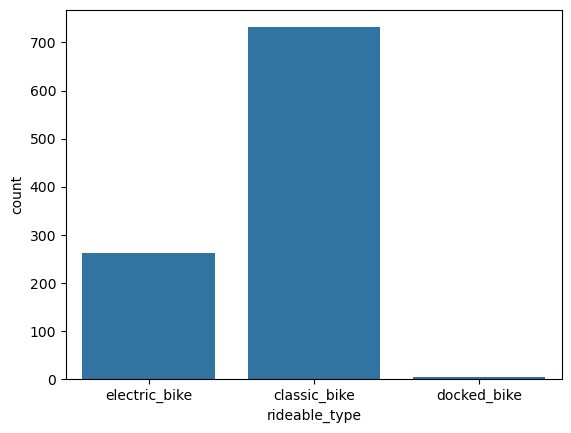

In [7]:
sns.countplot(data = df, x = 'rideable_type')

In [8]:
df['value'] = 1
df_t = df.groupby('end_station_name')['value'].count().reset_index()

In [9]:
top20 = df_t.nlargest(20, 'value')
top20

,end_station_name,value
528,W 31 St & 7 Ave,10
245,E 2 St & Avenue C,7
526,W 30 St & 10 Ave,7
19,12 Ave & W 40 St,6
124,Broadway & E 14 St,6
303,E 9 St & 5 Ave,6
472,Stanton St & Chrystie St,6
519,W 22 St & 8 Ave,6
543,W 44 St & 5 Ave,6
168,Central Park West & W 72 St,5


<Axes: xlabel='value', ylabel='end_station_name'>

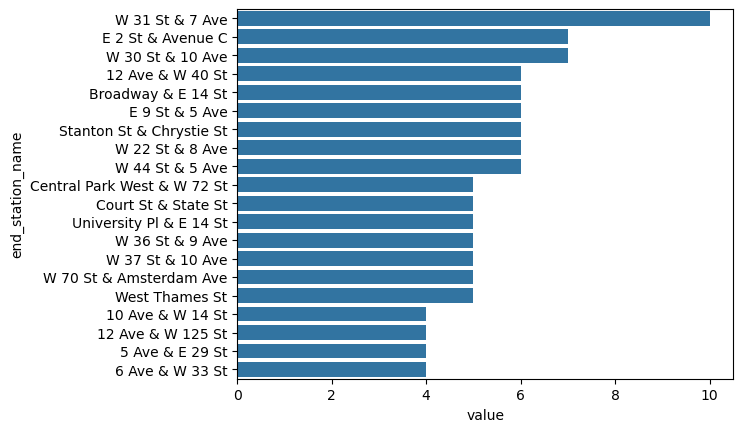

In [10]:
sns.barplot(data = top20, x = 'value', y = 'end_station_name')

C:\Users\maryp\AppData\Local\Temp\ipykernel_21732\2499621831.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = top20, x = 'value', y = 'end_station_name', palette=("Blues"))


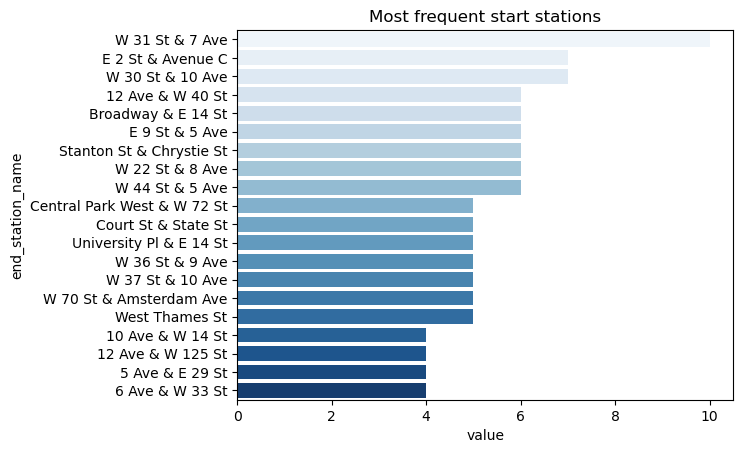

In [11]:
sns.barplot(data = top20, x = 'value', y = 'end_station_name', palette=("Blues")) 
plt.title("Most frequent start stations")
plt.show()

C:\Users\maryp\AppData\Local\Temp\ipykernel_21732\2420412360.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = top20, x = 'value', y = 'end_station_name', palette=("Blues_r"))


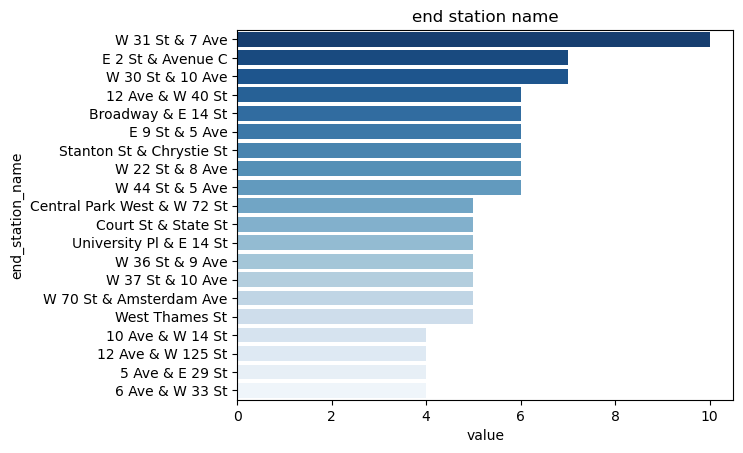

In [12]:
sns.barplot(data = top20, x = 'value', y = 'end_station_name', palette=("Blues_r"))
plt.title("end station name")
plt.show()


ValueError: Could not interpret value `bike_rides_daily` for `y`. An entry with this name does not appear in `data`.

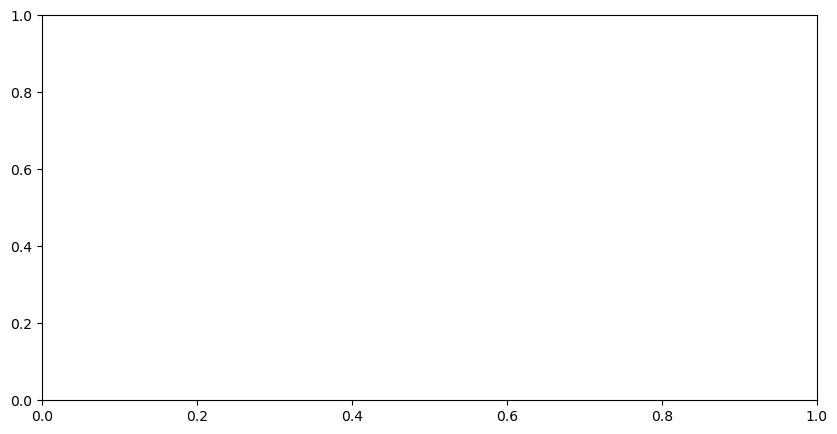

In [13]:
fig,ax = plt.subplots(figsize=(10, 5))
sns.lineplot(data = df,x="date",y="bike_rides_daily", color = "b")
ax.set_xlabel("Year 2022", fontsize = 14) # set x-axis label
ax.set_ylabel("Bike rides daily", color = "navy", fontsize = 14) # set y-axis label

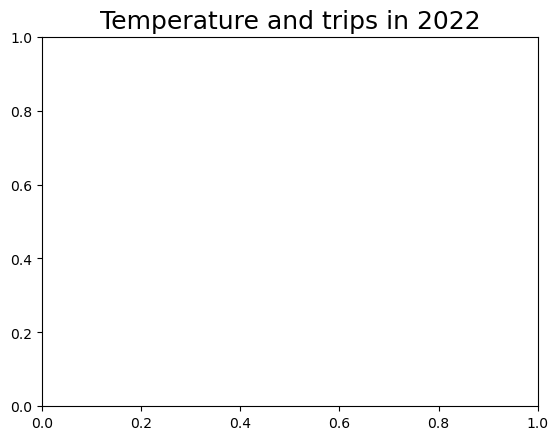

In [14]:
ax2 = ax.twinx()
sns.lineplot(data = df['avgTemp'], color="r", ax=ax2)
ax2.set_ylabel("Average temperatures", color = "red",fontsize=14)
plt.title('Temperature and trips in 2022', fontsize = 18)
plt.show()

In [15]:
plt.figure(figsize=(9,5))
sns.boxplot(x = 'gender', y = 'age', data = df, palette = "Blues_r")
plt.show()

ValueError: Could not interpret value `gender` for `x`. An entry with this name does not appear in `data`.

<Figure size 900x500 with 0 Axes>

In [16]:
sns.boxplot(x = 'gender', y = 'age', data = df, palette = {'Male': 'royalblue', 'Female': 'pink'})

ValueError: Could not interpret value `gender` for `x`. An entry with this name does not appear in `data`.

In [17]:
my_colors = {'Male': 'royalblue', 'Female': 'pink'}
sns.boxplot(x = 'gender', y = 'age', data = df, palette = my_colors)

ValueError: Could not interpret value `gender` for `x`. An entry with this name does not appear in `data`.

In [18]:
sns.violinplot(x = 'gender', y = 'age', data = df, palette = {'Male': 'royalblue', 'Female': 'pink'})
plt.show()

ValueError: Could not interpret value `gender` for `x`. An entry with this name does not appear in `data`.

In [19]:
sns.stripplot(x = 'gender', y = 'age', data = df, hue = 'usertype')
plt.show()

ValueError: Could not interpret value `gender` for `x`. An entry with this name does not appear in `data`.

In [20]:
grid = sns.FacetGrid(df, col = "gender")
grid.map(sns.histplot, "age", bins = 15)

KeyError: 'gender'

In [ ]:
sns.set_style('darkgrid')
plt.figure(figsize=(9,5))
sns.displot(df['age'], bins = 15)
plt.show()

In [21]:
sns.set_style("dark")
sns.set_palette('PuRd_r')

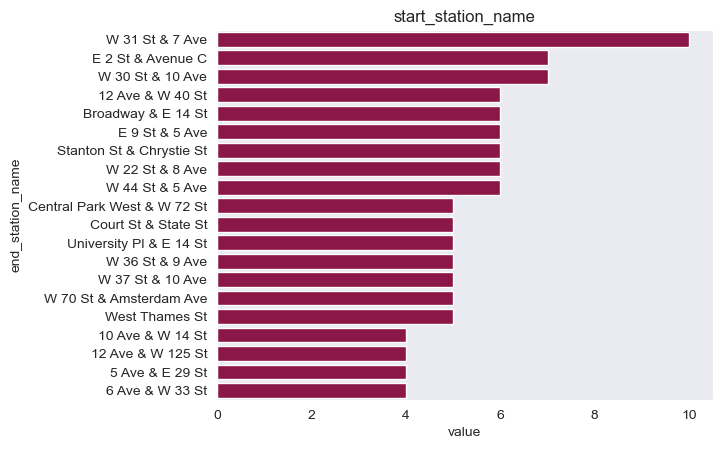

In [22]:
sns.set_palette('PuRd_r')
sns.barplot(data = top20, x = 'value', y = 'end_station_name')
plt.title("start_station_name")
plt.show()

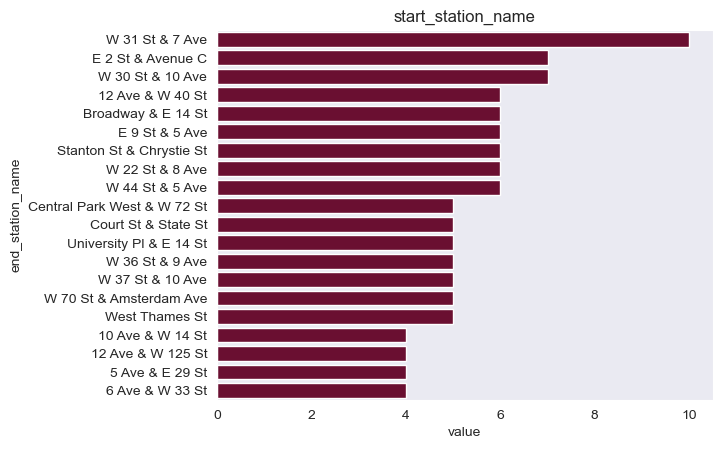

In [23]:
sns.set_palette('PuRd_r', n_colors = 20)
sns.barplot(data = top20, x = 'value', y = 'end_station_name')
plt.title("start_station_name")
plt.show()


In [24]:
with sns.dark_palette("xkcd:blue", 20):
    sns.barplot(x = "Words", y = "Word type",
    saturation = 0.9, data = top20).set_title("Alice in Wonderland - top 20 word types used")

ValueError: Could not interpret value `Words` for `x`. An entry with this name does not appear in `data`.

In [25]:
plt.figure(figsize = (10, 5))
with sns.color_palette('PuRd_r', n_colors = 20):
    sns.barplot(data = top20, x = 'value', y = 'start_station_name	').set_title("Most frequent start` `stations")

ValueError: Could not interpret value `start_station_name	` for `y`. An entry with this name does not appear in `data`.

<Figure size 1000x500 with 0 Axes>

In [26]:
sns.set_style("dark")
sns.set_palette('PuRd_r')

In [30]:
sns.set_theme(style = "white", palette = "bright")
sns.kdeplot(df['tripduration'], fill = True)
plt.show()

KeyError: 'tripduration'

In [29]:
sns.relplot(data = df, x = 'tripduration', y = 'age', hue = 'gender')

ValueError: Could not interpret value `tripduration` for `x`. An entry with this name does not appear in `data`.